In [1]:
import osmnx as ox
import numpy as np
hm_osmid='R68454'

hm_box=ox.geocode_to_gdf(hm_osmid, by_osmid=True)

hm_box_poly=hm_box.geometry[0]

<Axes: >

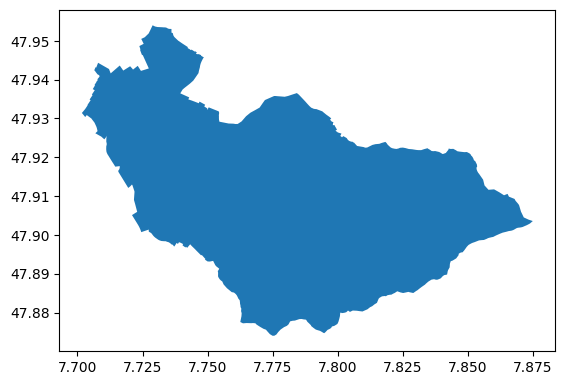

In [2]:
hm_box.plot()

In [10]:
network_type = "walk"
hm_walk=ox.graph_from_polygon(hm_box_poly,network_type=network_type)
hm_walk_grs=ox.projection.project_graph(hm_walk,to_crs=('EPSG:25832'))

In [15]:
raster_path=["./Geländemodelle/dgm025_32_403_5306_2_bw/dgm025_32_403_5306_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5306_2_bw/dgm025_32_403_5307_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5306_2_bw/dgm025_32_404_5306_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5306_2_bw/dgm025_32_404_5307_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5308_2_bw/dgm025_32_403_5308_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5308_2_bw/dgm025_32_403_5309_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5308_2_bw/dgm025_32_404_5308_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5308_2_bw/dgm025_32_404_5309_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5310_2_bw/dgm025_32_403_5310_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5310_2_bw/dgm025_32_403_5311_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5310_2_bw/dgm025_32_404_5310_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_403_5310_2_bw/dgm025_32_404_5311_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_405_5304_2_bw/dgm025_32_405_5304_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_405_5304_2_bw/dgm025_32_405_5305_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_405_5304_2_bw/dgm025_32_406_5304_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_405_5304_2_bw/dgm025_32_406_5305_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_405_5306_2_bw/dgm025_32_405_5306_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_405_5306_2_bw/dgm025_32_405_5307_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_405_5306_2_bw/dgm025_32_406_5306_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_405_5306_2_bw/dgm025_32_406_5307_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_405_5308_2_bw/dgm025_32_405_5308_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5308_2_bw/dgm025_32_405_5308_2_bw/dgm025_32_405_5308_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5308_2_bw/dgm025_32_405_5308_2_bw/dgm025_32_405_5309_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5308_2_bw/dgm025_32_405_5308_2_bw/dgm025_32_406_5308_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5308_2_bw/dgm025_32_405_5308_2_bw/dgm025_32_406_5309_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5308_2_bw/dgm025_32_405_5309_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5308_2_bw/dgm025_32_406_5308_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5308_2_bw/dgm025_32_406_5309_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5310_2_bw/dgm025_32_405_5310_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5310_2_bw/dgm025_32_405_5311_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5310_2_bw/dgm025_32_406_5310_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_405_5310_2_bw/dgm025_32_406_5311_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_407_5302_2_bw/dgm025_32_407_5302_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5302_2_bw/dgm025_32_407_5303_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5302_2_bw/dgm025_32_408_5302_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5302_2_bw/dgm025_32_408_5303_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5304_2_bw/dgm025_32_407_5304_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5304_2_bw/dgm025_32_407_5305_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5304_2_bw/dgm025_32_408_5304_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5304_2_bw/dgm025_32_408_5305_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5306_2_bw/dgm025_32_407_5306_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5306_2_bw/dgm025_32_407_5307_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5306_2_bw/dgm025_32_408_5306_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5306_2_bw/dgm025_32_408_5307_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_407_5308_2_bw/dgm025_32_407_5308_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_407_5308_2_bw/dgm025_32_407_5309_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_407_5308_2_bw/dgm025_32_408_5308_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_407_5308_2_bw/dgm025_32_408_5309_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_407_5310_2_bw/dgm025_32_407_5310_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_407_5310_2_bw/dgm025_32_407_5311_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_407_5310_2_bw/dgm025_32_408_5310_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_407_5310_2_bw/dgm025_32_408_5311_1_bw_2017.tif",
"./Geländemodelle/dgm025_32_409_5302_2_bw/dgm025_32_409_5302_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5302_2_bw/dgm025_32_409_5303_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5302_2_bw/dgm025_32_410_5302_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5302_2_bw/dgm025_32_410_5303_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5304_2_bw/dgm025_32_409_5304_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5304_2_bw/dgm025_32_409_5305_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5304_2_bw/dgm025_32_410_5304_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5304_2_bw/dgm025_32_410_5305_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5306_2_bw/dgm025_32_409_5306_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5306_2_bw/dgm025_32_409_5307_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5306_2_bw/dgm025_32_410_5306_1_bw_2019.tif",
"./Geländemodelle/dgm025_32_409_5306_2_bw/dgm025_32_410_5307_1_bw_2019.tif"
]

ox.add_node_elevations_raster(hm_walk_grs,raster_path)

In [16]:
nc = ox.plot.get_node_colors_by_attr(hm_walk_grs, "elevation", cmap="plasma")

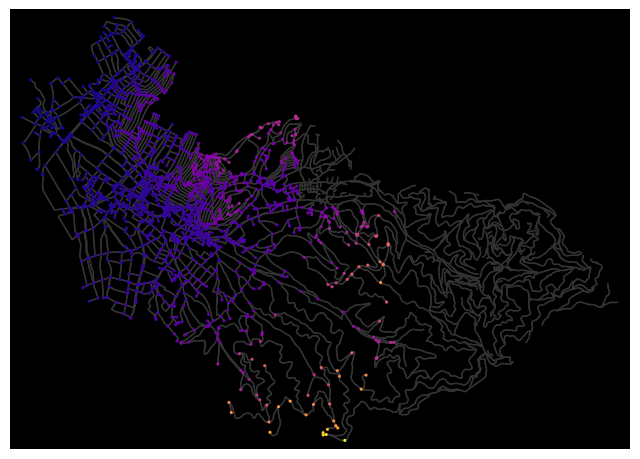

In [17]:
fig, ax = ox.plot.plot_graph(hm_walk_grs, node_color=nc, node_size=5, edge_color="#333333", bgcolor="k")

In [ ]:
raster_path[3]

In [ ]:
hm_walk[250131688]

In [ ]:
hm_walk.to_crs('EPSG:25832')

In [ ]:

ox.add_node_elevations_raster(hm_walk_grs,"Geländemodelle/dgm025_32_403_5308_2_bw/*.tif")